# в) Будем искать решение неавтономного уравнения Ван-дер-Поля, траектория-«утка»:
$$
\begin{cases}
\frac{\delta u}{\delta t} = -a(\frac{u^{3}}{3}-u)+av = f(u,v)
\\
\frac{\delta v}{\delta t} = -u+A \cos{wt}=g(u,v)
\end{cases}
$$
С коэффициентом a:
$
1 \le a \le 10^{3}
$

И начальными условиями:
$u_{0}=2;$&ensp;$ v_{0}=0;$&emsp;$0 \le t \le 200$

Нужно рассмотреть два случая:
$0 < A < 1$ &emsp; и &emsp;
$1 < A < \sqrt{1+\frac{1}{64w^{2}}}$

P.S. Проведена замена $y_{1}=u$ и $y_{2}=v$

In [1]:
from math import *

# Константы времени
t_max = 200
t_min = 0

# Функции правой части системы
def first_equation(u_n, v_n, a):
    return -a * (u_n ** 3 / 3 - u_n) + v_n * a
def second_equation(u_n, v_n, a, t, A=0.5, w=10):
    return -u_n + A * cos(w * t)

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
from warnings import catch_warnings

# Функция для построения графиков, не несет логического содержания
def build_grafics(
    func_method, 
    init_w=10, func_w=lambda x: x, 
    init_tau=1e-3, func_tau=lambda x: x, 
    M_height=1, M_weight=3, 
    size_height=17, size_weight=20,
    A=0.5
):
    # Настройка выведения
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[1] = size_height  # height
    fig_size[0] = size_weight  # weight
    plt.rcParams["figure.figsize"] = fig_size
    fig = plt.figure()
    
    # Решаем
    tau = init_tau
    w = init_w
    a = 1
    
    for i in range(0, M_height):
        N = int((t_max - t_min) / tau)
        time = np.linspace(t_min, t_max, N)

        u = np.zeros(N)
        v = np.zeros(N)
        u[0] = 2
        v[0] = 0
        with catch_warnings(record=True) as caught_warnings:
            func_method(u, v, a, tau, N, A, w)
            if caught_warnings:
                print(f'Решение расходится при w={w} и tau={tau:.2e}')

        ax = plt.subplot(M_height, M_weight, 3 * i + 1)
        plt.plot(time, u, linewidth=3.0)
        ax.set_title(f'Решение u(t) c w={w}; tau={tau:.2e}')

        ax = plt.subplot(M_height, M_weight, 3 * i + 2)
        plt.plot(time, v, linewidth=3.0)
        ax.set_title(f'Решение v(t) c w={w}; tau={tau:.2e}')

        ax = plt.subplot(M_height, M_weight, 3 * i + 3)
        plt.plot(u, v, linewidth=3.0)
        ax.set_title(f'Решение v(u) c w={w}; tau={tau:.2e}')

        w = func_w(w)
        tau = func_tau(tau)

## 1. Метод Рунге-Кутты 1-го порядка точности
$$
\begin{cases}
\frac{u_{n+1}-u_{n}}{\tau} = -a(\frac{u_{n}^{3}}{3}-u_{n})+av_{n}
\\
\frac{v_{n+1}-v_{n}}{\tau} = -u_{n}+A \cos{wt} 
\end{cases}
$$
И получим:
$$
\begin{cases}
u_{n+1} = u_{n}(1-a\tau(\frac{u_{n}^{2}}{3}-1))+av_{n}\tau
\\
v_{n+1} = -u_{n}\tau+\tau A \cos{wt}+v_{n}
\end{cases}
$$
Также найдем собственные значения матрицы:
$$
Y = \begin{pmatrix}
-a(\frac{u^{2}}{3}-1) & a \\
-1 & 0
\end{pmatrix}
$$

$$
\lambda_{1,2}=\frac{a(1-\frac{u^{2}}{3})\pm\sqrt{a^{2}(1-\frac{u^{2}}{3})^{2}-4a}}{2}
$$

А так как функция устойчивости: $R(z)=1+z=1+h\lambda$, то при нормальных $u\approx20$ и больших $a \ge 100$ задача становится жесткой и явный метод уже плох для решения.

В этом случае диапозон шага приблизительно равен: 
$\tau \in [0; \frac{2}{|\lambda_{большее}|}]\approx[0; \frac{2}{14000}]=[0;1e-4]$

In [3]:
# Функция первого порядка точности Рунге-Кутты
def first_runkut(u, v, a, tau, N, A, w):
    for n in range(0, N - 1):
        u[n+1] = u[n] + tau * first_equation(u[n], v[n], a)
        v[n+1] = v[n] + tau * second_equation(u[n], v[n], a, n * tau, A, w)

##### Найдем сначало решения при различных $a$ (A=0.5)

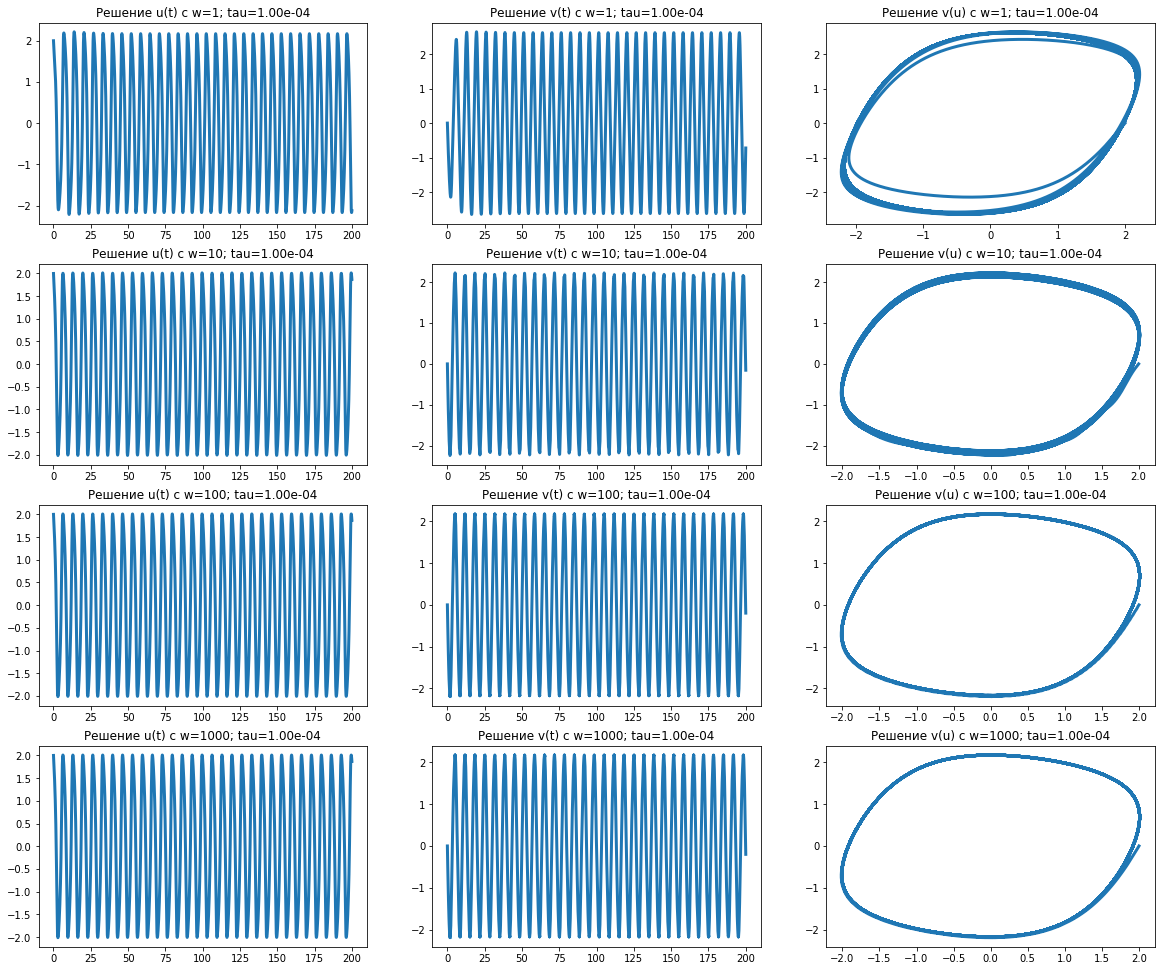

In [4]:
build_grafics(
    first_runkut, 
    init_w=1,
    func_w=lambda x: x * 10,
    init_tau=1e-4,
    M_height=4
)

##### Найдем решения при различные $\tau$ (A=0.5)

Решение расходится при w=10 и tau=1.00e+00


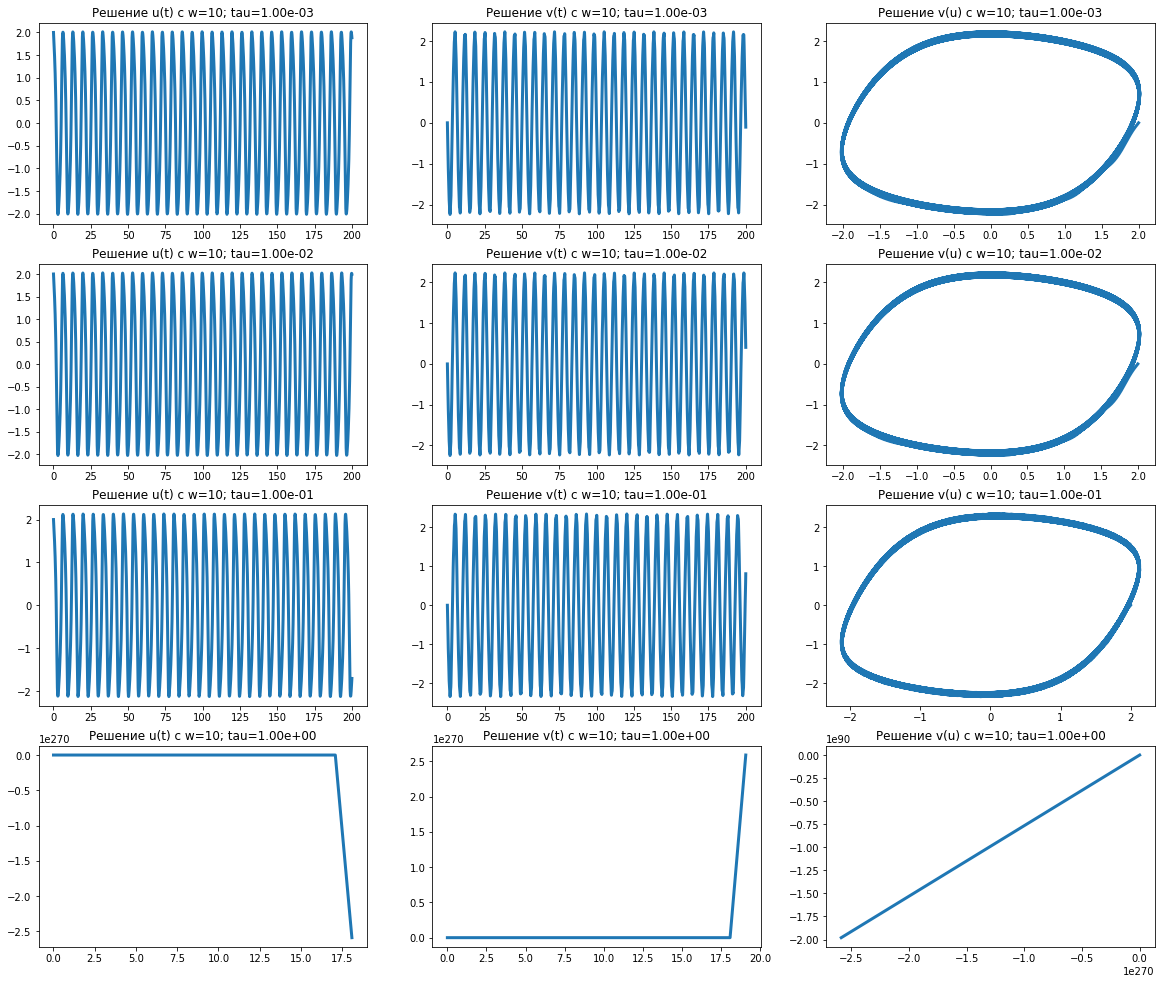

In [5]:
build_grafics(
    first_runkut, 
    init_w=10,
    init_tau=1e-3,
    func_tau=lambda x: x * 10,
    M_height=4
)

##### Сравнение при различных коэффициентах A
При коэффициенте $A =\frac {\sqrt{1+\frac{1}{64w^{2}}}+1}{2}$:

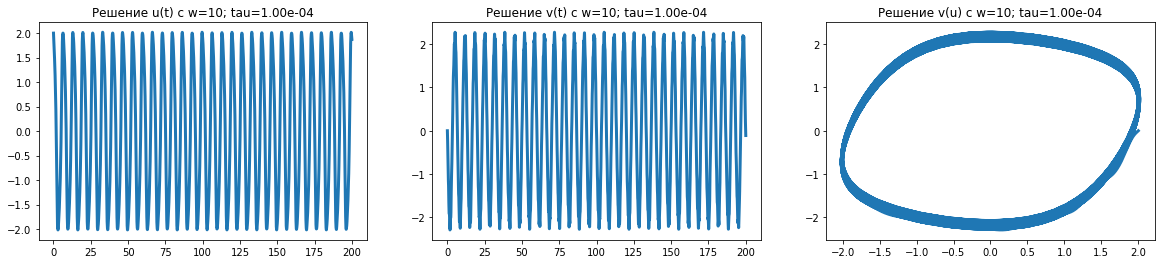

In [6]:
A = 1.000038

build_grafics(
    first_runkut, 
    init_w=10,
    A=A,
    init_tau=1e-4,
    M_height=1,
    size_height=4
)

При коэффициенте $A =0.7$:

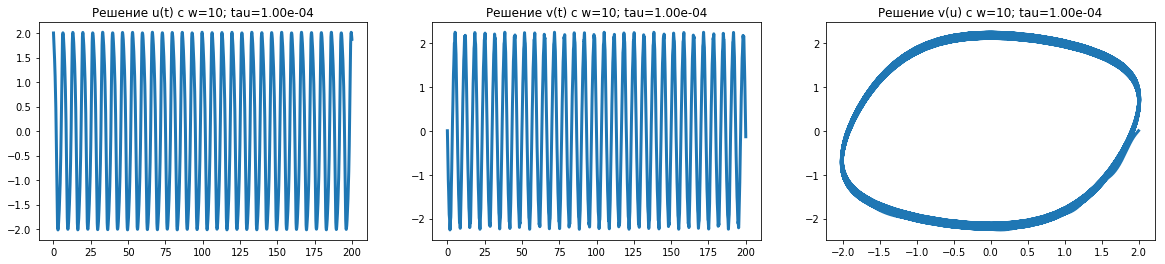

In [7]:
A = 0.7

build_grafics(
    first_runkut, 
    init_w=10,
    A=A,
    init_tau=1e-4,
    M_height=1,
    size_height=4
)

## 2. Метод Рунге-Кутты 4-го порядка точности
Рассмотрим решение уравнения $y' = f(x, y)$ с помощью метода с коэффициентами:
$$
\begin{cases}
y_{n+1} = y_{n} + \frac{\tau}{6} (k_1 + 2 k_2 + 2 k_3 + k_4)\\
k_{1} = f(x_{n}, y_{n})\\
k_{2} = f(x_{n} + \frac{\tau}{2}, y_{n} + \frac{\tau}{2} k_{1})\\
k_{3} = f(x_{n} + \frac{\tau}{2}, y_{n} + \frac{\tau}{2} k_{2})\\
k_{4} = f(x_{n} + \tau, y_{n} + \tau k_{3})
\end{cases}
$$

In [8]:
# Функция четвертого порядка точности Рунге-Кутты
def forth_runkut(u, v, a, tau, N, A, w):
    for n in range(0, N - 1):
        k_1_u = first_equation(u[n], v[n], a)
        k_1_v = second_equation(u[n], v[n], a, n*tau, A, w)
        
        k_2_u = first_equation(u[n] + tau / 2 * k_1_u, v[n] + tau / 2 * k_1_v, a)
        k_2_v = second_equation(u[n] + tau / 2 * k_1_u, v[n] + tau / 2 * k_1_v, a, n*tau+tau/2, A, w)
        
        k_3_u = first_equation(u[n] + tau / 2 * k_2_u, v[n] + tau / 2 * k_2_v, a)
        k_3_v = second_equation(u[n] + tau / 2 * k_2_u, v[n] + tau / 2 * k_2_v, a, n*tau+tau/2, A, w)
        
        k_4_u = first_equation(u[n] + tau * k_3_u, v[n] + tau * k_3_v, a)
        k_4_v = second_equation(u[n] + tau * k_3_u, v[n] + tau * k_3_v, a, n*tau+tau, A, w)
        
        u[n+1] = u[n] + tau / 6 * (k_1_u + 2 * k_2_u + 2 * k_3_u + k_4_u)
        v[n+1] = v[n] + tau / 6 * (k_1_v + 2 * k_2_v + 2 * k_3_v + k_4_v)

##### Найдем сначало решения при различных $a$

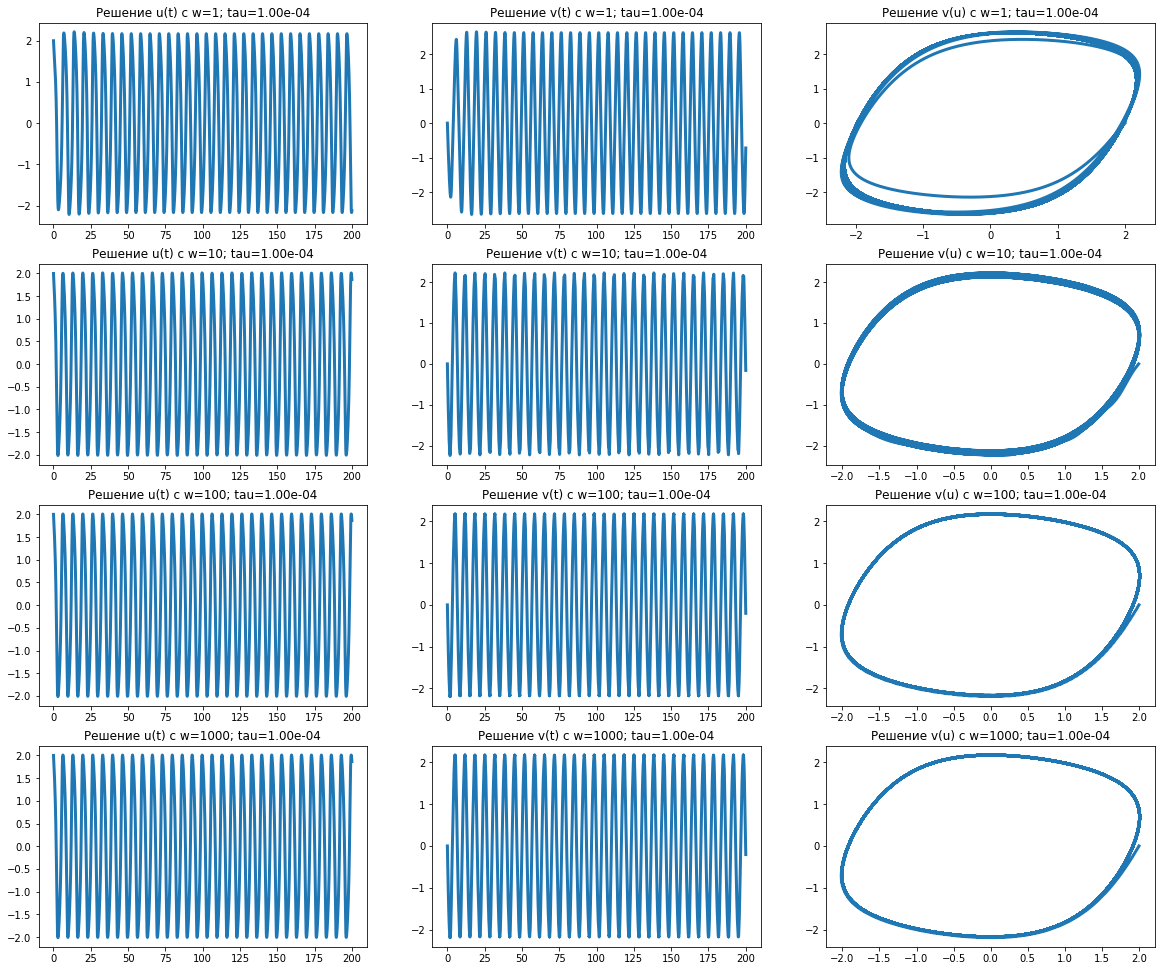

In [9]:
build_grafics(
    forth_runkut, 
    init_w=1,
    func_w=lambda x: x * 10,
    init_tau=1e-4,
    M_height=4
)

##### Найдем решения при различные $\tau$

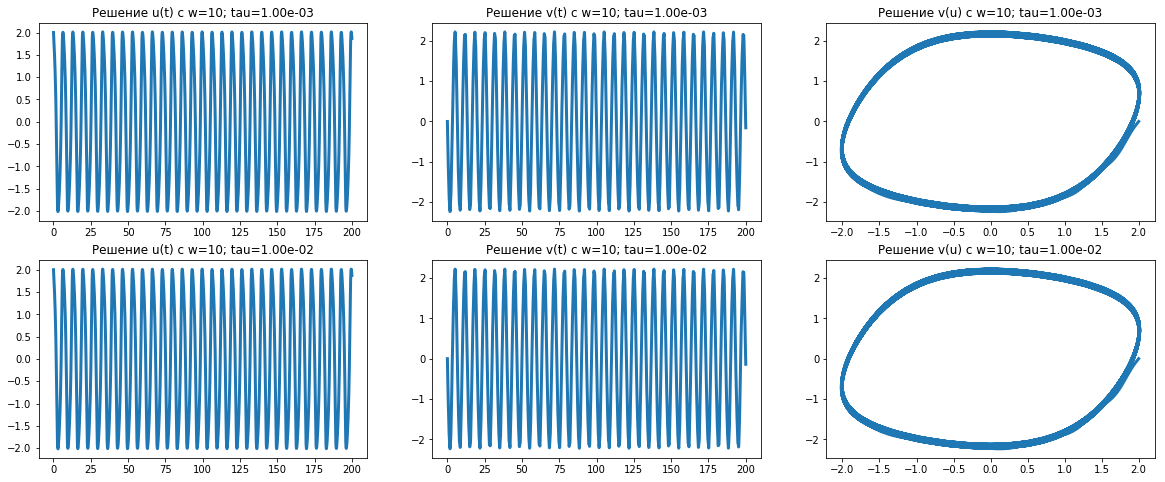

In [10]:
build_grafics(
    forth_runkut, 
    init_w=10,
    init_tau=1e-3,
    func_tau=lambda x: x * 10,
    M_height=2,
    size_height=8
)

Решение расходится при w=10 и tau=1.00e+01


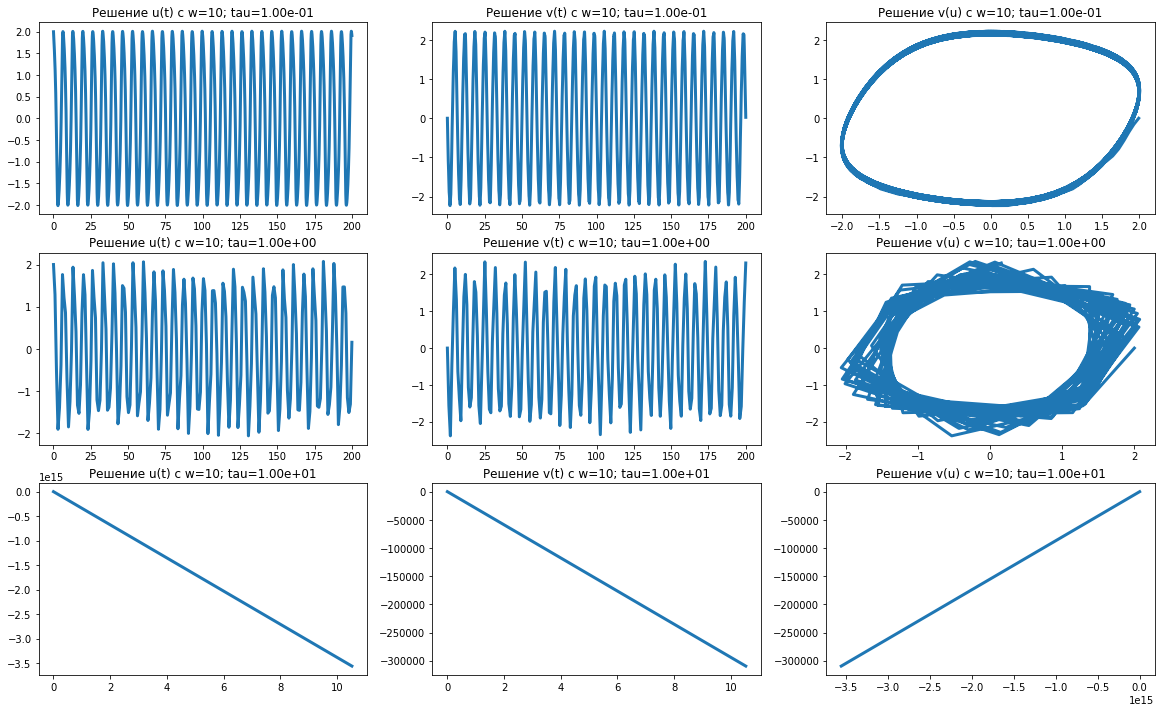

In [11]:
build_grafics(
    forth_runkut, 
    init_w=10,
    init_tau=1e-1,
    func_tau=lambda x: x * 10,
    M_height=3,
    size_height=12
)

## 3.  Неявный метод Хаммера-Холлинсворта
Рассмотрим решение уравнения $y' = f(x, y)$ с помощью метода с коэффициентами:

<img width=70/> | <img width=70/> | <img width=70/>
--- | --- | ---
$\frac{1}{2} - \frac{\sqrt{3}}{6}$ | $\frac{1}{4}$ | $\frac{1}{4} - \frac{\sqrt{3}}{6}$
$\frac{1}{2} + \frac{\sqrt{3}}{6}$ | $\frac{1}{4} + \frac{\sqrt{3}}{6}$ | $\frac{1}{4}$
<div /> | $\frac{1}{2}$ | $\frac{1}{2}$

В нашем случае получим, что (согласно вначале введенным обозначениям f и g:
$$
K_{1} = 
\begin{pmatrix}
k_{1}^{u}\\
k_{1}^{v}
\end{pmatrix} 
= 
\begin{pmatrix}
f(u_{n}+\tau a_{11} k_{1}^{u} + \tau a_{12} k_{2}^{u}; v_{n}+\tau a_{11} k_{1}^{v} + \tau a_{12} k_{2}^{v})\\
g(u_{n}+\tau a_{11} k_{1}^{u} + \tau a_{12} k_{2}^{u}; v_{n}+\tau a_{11} k_{1}^{v} + \tau a_{12} k_{2}^{v})
\end{pmatrix}
= 
F(\begin{pmatrix}u_{n}\\v_{n}\end{pmatrix}
+
\tau \begin{pmatrix}
k_{1}^{u} & k_{2}^{u} \\
k_{1}^{v} & k_{2}^{v} 
\end{pmatrix}
\begin{pmatrix} a_{11} \\ a_{12} \end{pmatrix})
=
F(\begin{pmatrix}u_{n}\\v_{n}\end{pmatrix}
+
\tau \begin{pmatrix}
K_{1} & K_{2} 
\end{pmatrix}
\begin{pmatrix} a_{11} \\ a_{12} \end{pmatrix})
$$ 

$$
K_{2} = 
F(\begin{pmatrix}u_{n}\\v_{n}\end{pmatrix}
+
\tau \begin{pmatrix}
K_{1} & K_{2} 
\end{pmatrix}
\begin{pmatrix} a_{21} \\ a_{22} \end{pmatrix})
$$

А значит получим: 
$$
\begin{pmatrix}
k_{1}^{u} & k_{2}^{u} \\
k_{1}^{v} & k_{2}^{v} 
\end{pmatrix} = \Bigg(\;
F\big(\begin{pmatrix}u_{n} \\v_{n}\end{pmatrix}
+
\tau \begin{pmatrix}
k_{1}^{u} & k_{2}^{u} \\
k_{1}^{v} & k_{2}^{v} 
\end{pmatrix}
\begin{pmatrix} a_{11} \\ a_{12} \end{pmatrix}\big); \;
F\big(\begin{pmatrix}u_{n} \\v_{n}\end{pmatrix}
+
\tau \begin{pmatrix}
k_{1}^{u} & k_{2}^{u} \\
k_{1}^{v} & k_{2}^{v} 
\end{pmatrix}
\begin{pmatrix} a_{21} \\ a_{22} \end{pmatrix}\big)
\;\Bigg)
$$

Тогда для:
$$
\begin{cases}
\frac{\delta u}{\delta t} = -a(\frac{u^{3}}{3}-u)+av = f(u,v)
\\
\frac{\delta v}{\delta t} = -u+A \cos{wt}=g(u,v)
\end{cases}
$$
Получаем систему линейных уравнений (4 уравнения) с неизвестными $k$. К сожалению из-за того, что метод неявный и таких коэффициентов, нельзя выразить в матричном виде решение системы. Нужно привести подобные члены, тогда получим:
$$
\begin{pmatrix}
a_{11}a(\frac{u_{n}^2}{3}-1)+1 & a_{12}a(\frac{u_{n}^2}{3}-1) & a_{11}a & a_{12}a\\
a_{21}a(\frac{u_{n}^2}{3}-1) & a_{22}a(\frac{u_{n}^2}{3}-1)+1 & a_{21}a & a_{22}a\\
a_{11} & a_{12} & 1 & 0\\
a_{21} & a_{22} & 0 & 1\\
\end{pmatrix} 
* 
\begin{pmatrix}
k_{1}^{u} \\ k_{2}^{u} \\ k_{1}^{v} \\ k_{2}^{v}
\end{pmatrix} 
= 
\begin{pmatrix}
f(u_{n},v_{n}) \\ f(u_{n},v_{n}) \\ g(u_{n},v_{n},t_{n}+с_{1}\tau) \\ g(u_{n},v_{n},t_{n}+с_{1}\tau)
\end{pmatrix}
$$

In [12]:
# Коэффициенты матрицы Бутчера
a11 = 1/4
a12 = 1/4 - 3**(1/2)/6
a21 = 1/4 + 3**(1/2)/6
a22 = 1/4
c1 = 1/2 - 3**(1/2)/6
c2 = 1/2 + 3**(1/2)/6
b1 = 1/2
b2 = 1/2

# Функция неявного метода Хаммера-Холлинсворта
def implicit_runkut(u, v, a, tau, N, A, w):
    for n in range(0, N - 1):
        coef = np.array([
            [a11 * a * (u[n] ** 2 / 3 - 1) + 1, a12 * a * (u[n] ** 2 / 3 - 1), a * a11, a * a12], 
            [a21 * a * (u[n] ** 2 / 3 - 1), a22 * a * (u[n] ** 2 / 3 - 1) + 1, a * a21, a * a22],
            [a11, a12, 1, 0],
            [a21, a22, 0, 1]
        ])
        B = np.array([
            first_equation(u[n], v[n], a),
            first_equation(u[n], v[n], a),
            second_equation(u[n], v[n], a, c1*tau, A, w),
            second_equation(u[n], v[n], a, c2*tau, A, w)
        ])
        K = np.linalg.solve(coef, B)
        
        u[n+1] = u[n] + tau * (b1 * K[0] + b2 * K[1])
        v[n+1] = v[n] + tau * (b1 * K[2] + b2 * K[3])

##### Найдем сначало решения при различных $a$

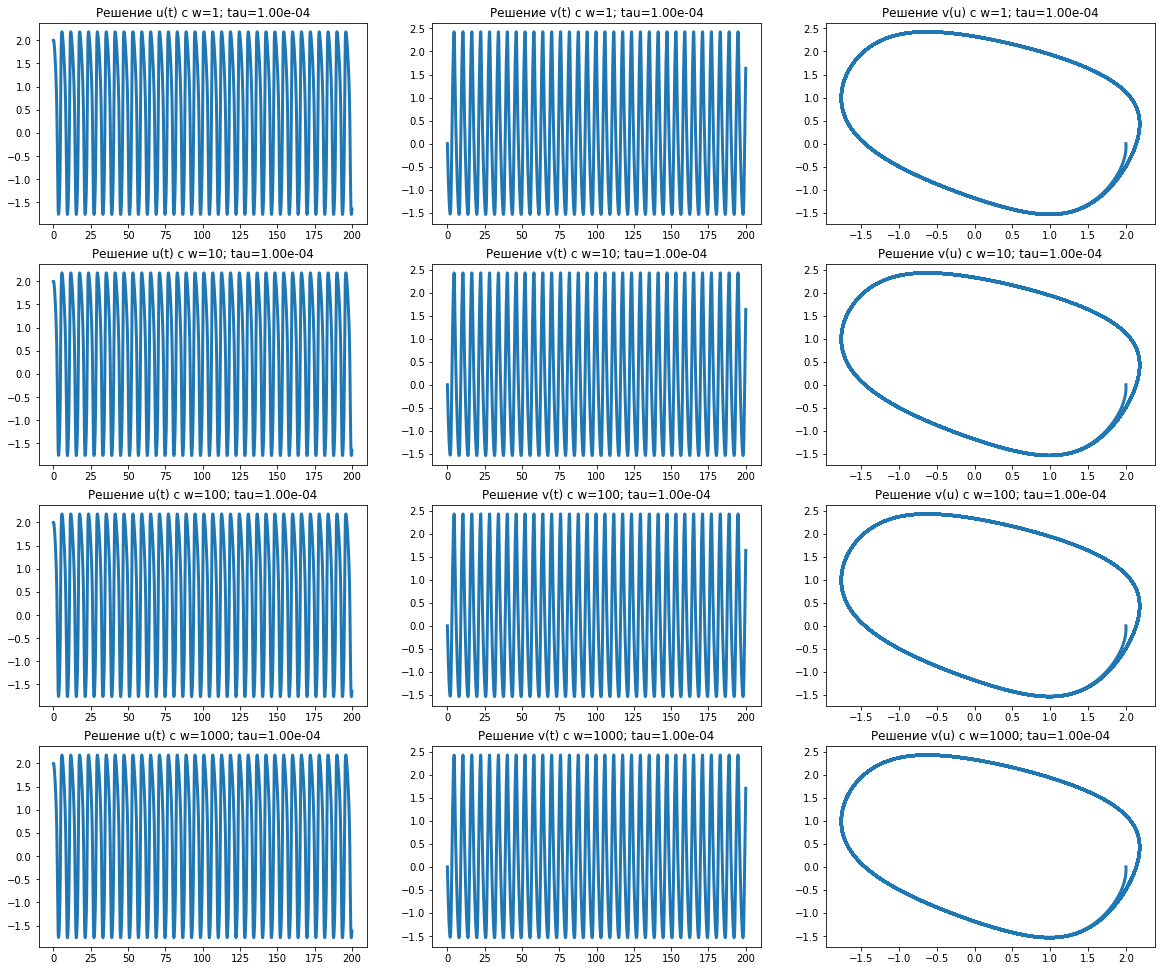

In [13]:
build_grafics(
    implicit_runkut, 
    init_w=1,
    func_w=lambda x: x * 10,
    init_tau=1e-4,
    M_height=4
)

##### Найдем решения при различные $\tau$

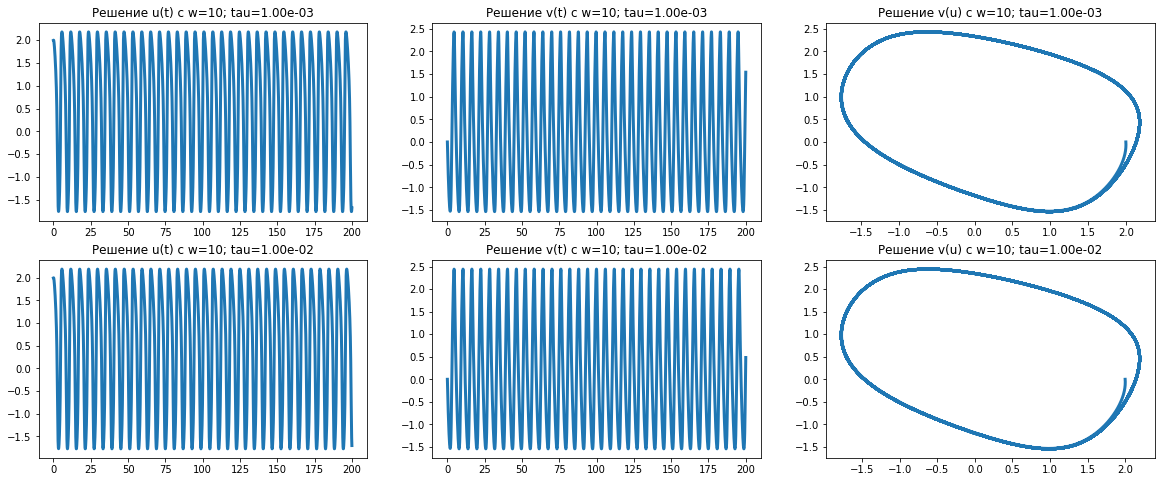

In [14]:
build_grafics(
    implicit_runkut, 
    init_w=10,
    init_tau=1e-3,
    func_tau=lambda x: x * 10,
    M_height=2,
    size_height=8
)

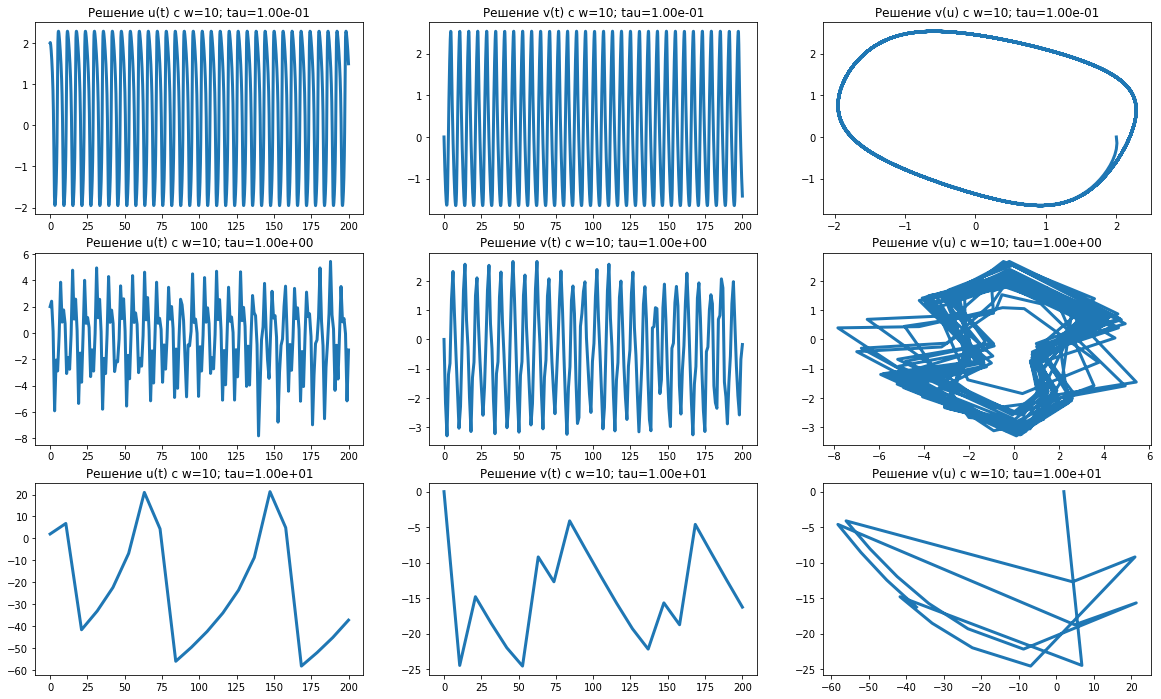

In [15]:
build_grafics(
    implicit_runkut, 
    init_w=10,
    init_tau=1e-1,
    func_tau=lambda x: x * 10,
    M_height=3,
    size_height=12
)

### Результат:
Таким образом получились графики согласно теории

Метод четвертого порядка показал лучшую точность, чем метод первого порядка

При этом заметим, что если явные методы расходились при больших $\tau$, то неявный метод не расходится уже(ну или сильно колеблется возле решения)